PROJETO ANALISE DE RISCO DE CRÉDITO EM OPERAÇÕES DE CREDITO/CREDIÁRIO PEQUENAS EMPRESAS

In [2]:
#!pip install xgboost
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Avaliação de Modelos
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve
)

# Validação cruzada e ajuste de hiperparâmetros
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Salvando e carregando modelos
import pickle

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Definindo o estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [3]:
# Carregar o dataset
df = pd.read_csv('dataset_crediario.csv')

# Visualizar as primeiras linhas do dataset para conferir o carregamento
df.head()

,CPF,Nome Completo,Profissão,Trabalha com Carteira Assinada,Idade,Localização,Renda Mensal,Estado Civil,Número de Dependentes,Score de Crédito,...,Data da Compra,Data de Entrega,Data da Última Compra,Data da Próxima Parcela,Número de Compras a Crédito Anteriores,Montante Total Já Financiado,Percentual de Comprometimento de Renda (%),Status do Pagamento Atual,Canal de Aquisição,Comentários e Histórico de Interações
0,104.965.823-05,Maria Eduarda Barros,Assessor parlamentar,True,32,Pires do Galho,16864,Viúvo,1,607,...,2023-12-12,2024-12-03,2023-08-24,2024-11-16,18,51699.26,49.43,Atrasado,Presencial,Consequatur culpa necessitatibus adipisci cons...
1,960.781.425-85,Isabel da Paz,Odontologista legal,False,34,Ramos,9649,Casado,3,818,...,2023-04-23,2024-11-29,2022-04-06,2024-12-13,10,94440.82,29.24,Atrasado,Presencial,Hic molestias delectus ipsa commodi iusto aper...
2,836.194.205-05,Pedro Miguel da Paz,Fiscal,True,60,Correia do Campo,10346,Solteiro,2,337,...,2022-02-06,2024-11-16,2021-12-27,2024-11-26,13,33504.70,16.35,Em dia,Telefone,Dicta ratione quas unde omnis vitae vero unde.
3,654.192.038-98,Joaquim da Mota,Administrador de banco de dados DBA,True,32,Pinto de Sales,6126,Viúvo,2,503,...,2024-06-24,2024-11-20,2023-12-31,2024-11-18,20,15372.90,36.83,Renegociado,Presencial,Delectus culpa veritatis tenetur distinctio il...
4,158.420.376-53,Lorena Rezende,Maquiador,True,39,Carvalho Grande,15230,Viúvo,3,447,...,2023-09-04,2024-11-20,2021-01-24,2024-11-14,9,24872.81,33.17,Renegociado,Online,Asperiores esse mollitia corporis tempore even...


In [4]:
import unidecode

# Renomear as colunas para letras minúsculas, com underscores e sem acentos
df.columns = [
    unidecode.unidecode(col).lower().replace(" ", "_") for col in df.columns
]

# Conferindo as novas colunas
df.head()


,cpf,nome_completo,profissao,trabalha_com_carteira_assinada,idade,localizacao,renda_mensal,estado_civil,numero_de_dependentes,score_de_credito,...,data_da_compra,data_de_entrega,data_da_ultima_compra,data_da_proxima_parcela,numero_de_compras_a_credito_anteriores,montante_total_ja_financiado,percentual_de_comprometimento_de_renda_(%),status_do_pagamento_atual,canal_de_aquisicao,comentarios_e_historico_de_interacoes
0,104.965.823-05,Maria Eduarda Barros,Assessor parlamentar,True,32,Pires do Galho,16864,Viúvo,1,607,...,2023-12-12,2024-12-03,2023-08-24,2024-11-16,18,51699.26,49.43,Atrasado,Presencial,Consequatur culpa necessitatibus adipisci cons...
1,960.781.425-85,Isabel da Paz,Odontologista legal,False,34,Ramos,9649,Casado,3,818,...,2023-04-23,2024-11-29,2022-04-06,2024-12-13,10,94440.82,29.24,Atrasado,Presencial,Hic molestias delectus ipsa commodi iusto aper...
2,836.194.205-05,Pedro Miguel da Paz,Fiscal,True,60,Correia do Campo,10346,Solteiro,2,337,...,2022-02-06,2024-11-16,2021-12-27,2024-11-26,13,33504.70,16.35,Em dia,Telefone,Dicta ratione quas unde omnis vitae vero unde.
3,654.192.038-98,Joaquim da Mota,Administrador de banco de dados DBA,True,32,Pinto de Sales,6126,Viúvo,2,503,...,2024-06-24,2024-11-20,2023-12-31,2024-11-18,20,15372.90,36.83,Renegociado,Presencial,Delectus culpa veritatis tenetur distinctio il...
4,158.420.376-53,Lorena Rezende,Maquiador,True,39,Carvalho Grande,15230,Viúvo,3,447,...,2023-09-04,2024-11-20,2021-01-24,2024-11-14,9,24872.81,33.17,Renegociado,Online,Asperiores esse mollitia corporis tempore even...


In [5]:
dicionario_colunas = {
    "cpf": "CPF do cliente, identificador único para cada cliente.",
    "nome_completo": "Nome completo do cliente.",
    "profissao": "Profissão do cliente.",
    "trabalha_com_carteira_assinada": "Indica se o cliente possui emprego formal (Sim/Não).",
    "idade": "Idade do cliente em anos.",
    "localizacao": "Cidade de residência do cliente.",
    "renda_mensal": "Renda mensal estimada do cliente em reais.",
    "estado_civil": "Estado civil do cliente (Solteiro, Casado, Divorciado, Viúvo).",
    "numero_de_dependentes": "Número de dependentes do cliente.",
    "score_de_credito": "Pontuação de crédito do cliente, refletindo histórico de crédito.",
    "inadimplencia_anterior": "Indica se o cliente possui histórico de inadimplência (Sim/Não).",
    "valor_total_do_credito_em_aberto": "Total de dívidas em aberto do cliente em reais.",
    "tipo_de_credito_utilizado_anteriormente": "Tipo de crédito que o cliente já utilizou (Pessoal, Veículo, Imobiliário, etc.).",
    "valor_da_compra_a_credito": "Valor total da compra a prazo financiada pelo cliente em reais.",
    "numero_de_parcelas": "Número de parcelas em que a compra foi dividida.",
    "taxa_de_juros_mensal": "Taxa de juros mensal aplicada à operação de crédito (%).",
    "taxa_de_juros_anual": "Taxa de juros anual aplicada à operação de crédito (%).",
    "percentual_de_entrada": "Percentual do valor da compra pago como entrada.",
    "valor_da_entrada": "Valor monetário exato pago como entrada pelo cliente em reais.",
    "compra_com_entrada": "Indica se a compra teve entrada (Sim/Não).",
    "tipo_de_produto_ou_servico_adquirido": "Tipo de produto ou serviço que foi comprado pelo cliente.",
    "data_da_compra": "Data em que a compra foi realizada.",
    "data_de_entrega": "Data em que o produto ou serviço foi entregue ao cliente.",
    "data_da_ultima_compra": "Data da última compra do cliente com a empresa.",
    "data_da_proxima_parcela": "Data de vencimento da próxima parcela da compra.",
    "numero_de_compras_a_credito_anteriores": "Número de compras a crédito que o cliente já fez com a empresa.",
    "montante_total_ja_financiado": "Valor total que o cliente já financiou na empresa em reais.",
    "percentual_de_comprometimento_de_renda": "Percentual da renda mensal do cliente comprometido com outras dívidas.",
    "status_do_pagamento_atual": "Status atual do pagamento (Em dia, Atrasado, Renegociado).",
    "canal_de_aquisicao": "Canal pelo qual o cliente adquiriu o produto/serviço (Presencial, Online, Telefone).",
    "comentarios_e_historico_de_interacoes": "Comentários e histórico de interações com o cliente."
}

# Exibindo o dicionário
dicionario_colunas


{'cpf': 'CPF do cliente, identificador único para cada cliente.',
 'nome_completo': 'Nome completo do cliente.',
 'profissao': 'Profissão do cliente.',
 'trabalha_com_carteira_assinada': 'Indica se o cliente possui emprego formal (Sim/Não).',
 'idade': 'Idade do cliente em anos.',
 'localizacao': 'Cidade de residência do cliente.',
 'renda_mensal': 'Renda mensal estimada do cliente em reais.',
 'estado_civil': 'Estado civil do cliente (Solteiro, Casado, Divorciado, Viúvo).',
 'numero_de_dependentes': 'Número de dependentes do cliente.',
 'score_de_credito': 'Pontuação de crédito do cliente, refletindo histórico de crédito.',
 'inadimplencia_anterior': 'Indica se o cliente possui histórico de inadimplência (Sim/Não).',
 'valor_total_do_credito_em_aberto': 'Total de dívidas em aberto do cliente em reais.',
 'tipo_de_credito_utilizado_anteriormente': 'Tipo de crédito que o cliente já utilizou (Pessoal, Veículo, Imobiliário, etc.).',
 'valor_da_compra_a_credito': 'Valor total da compra a p

In [6]:
# Quantidade de linhas e colunas
num_linhas, num_colunas = df.shape
print(f"O dataset possui {num_linhas} linhas e {num_colunas} colunas.")

# Visualizar 10 linhas aleatórias do dataset
df.sample(10)


O dataset possui 1000 linhas e 31 colunas.


,cpf,nome_completo,profissao,trabalha_com_carteira_assinada,idade,localizacao,renda_mensal,estado_civil,numero_de_dependentes,score_de_credito,...,data_da_compra,data_de_entrega,data_da_ultima_compra,data_da_proxima_parcela,numero_de_compras_a_credito_anteriores,montante_total_ja_financiado,percentual_de_comprometimento_de_renda_(%),status_do_pagamento_atual,canal_de_aquisicao,comentarios_e_historico_de_interacoes
329,687.359.421-00,Gustavo das Neves,Odontopediatra,True,42,Aragão,10036,Casado,1,656,...,2022-10-11,2024-11-28,2024-06-29,2024-12-30,19,78674.97,39.81,Renegociado,Online,Libero ea quidem totam similique occaecati por...
807,923.178.506-03,Emanuella Vieira,Pedicure,True,27,da Mota,15648,Viúvo,3,599,...,2021-12-11,2024-11-18,2024-02-17,2024-12-06,16,12576.44,40.81,Renegociado,Presencial,Voluptate optio in unde maiores pariatur sit m...
940,085.371.296-40,Emilly Souza,Oftalmologista,False,25,da Costa do Campo,6682,Divorciado,2,489,...,2022-07-07,2024-11-10,2022-08-05,2024-12-17,4,8439.29,45.01,Renegociado,Telefone,Ipsam sunt expedita possimus tenetur nostrum r...
970,870.934.256-74,Sra. Lavínia Rodrigues,Engenheiro petroquímico,True,60,Alves,8347,Solteiro,3,767,...,2023-11-04,2024-11-10,2023-06-10,2024-11-05,13,51561.93,36.59,Em dia,Online,Rerum eaque nostrum tempore laborum veniam.
952,459.230.178-14,João Felipe Gomes,Fundidor,True,67,Vieira do Norte,4662,Solteiro,3,808,...,2024-03-26,2024-11-22,2020-12-09,2024-11-11,7,20172.27,30.27,Renegociado,Online,Saepe officiis ratione nulla incidunt ex eaque.
616,504.789.263-83,Sr. Paulo Melo,Dublador,True,22,Freitas,10669,Casado,2,448,...,2024-09-02,2024-11-28,2021-03-30,2024-12-27,14,97457.51,24.66,Em dia,Presencial,Voluptatum deleniti explicabo ipsum reiciendis...
475,517.960.482-67,Bruno Souza,Assessor de imprensa,False,35,Ferreira,5309,Divorciado,4,574,...,2022-05-10,2024-11-25,2021-09-18,2024-12-03,3,71733.81,31.39,Renegociado,Online,Iste vero minima eius itaque id fugiat molestiae.
722,580.364.921-05,Gabrielly Moura,Urbanista,True,66,Aragão,14691,Casado,1,556,...,2022-03-13,2024-11-13,2022-01-25,2024-12-30,14,22245.45,19.66,Em dia,Telefone,Aperiam qui explicabo nobis a ipsum voluptatum...
409,396.547.281-09,Srta. Maria Alice da Rocha,Laboratorista,True,65,Gonçalves,9872,Solteiro,4,733,...,2024-10-11,2024-11-08,2023-10-21,2024-11-18,16,46533.08,32.38,Renegociado,Telefone,Reprehenderit sunt eius libero ea voluptatibus.
124,942.506.718-01,Joana da Mata,Cartógrafo,True,53,da Luz Grande,12562,Solteiro,0,816,...,2024-10-09,2024-11-14,2023-10-03,2024-12-07,20,73339.87,31.43,Renegociado,Online,Veritatis voluptatum iure magni harum nobis pl...


In [7]:
# Verificar o tipo de dados de cada coluna
df.dtypes


cpf                                            object
nome_completo                                  object
profissao                                      object
trabalha_com_carteira_assinada                   bool
idade                                           int64
localizacao                                    object
renda_mensal                                    int64
estado_civil                                   object
numero_de_dependentes                           int64
score_de_credito                                int64
inadimplencia_anterior                           bool
valor_total_do_credito_em_aberto              float64
tipo_de_credito_utilizado_anteriormente        object
valor_da_compra_a_credito                     float64
numero_de_parcelas                              int64
taxa_de_juros_mensal_(%)                      float64
taxa_de_juros_anual_(%)                       float64
percentual_de_entrada_(%)                       int64
valor_da_entrada            

In [8]:
# Selecionar colunas numéricas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Colunas Numéricas:")
print(df[colunas_numericas].head())


Colunas Numéricas:
   idade  renda_mensal  numero_de_dependentes  score_de_credito  \
0     32         16864                      1               607   
1     34          9649                      3               818   
2     60         10346                      2               337   
3     32          6126                      2               503   
4     39         15230                      3               447   

   valor_total_do_credito_em_aberto  valor_da_compra_a_credito  \
0                          33709.71                   24786.79   
1                          25427.84                   23634.80   
2                          43498.07                   16539.66   
3                          17345.16                   34681.74   
4                          12753.48                    4705.92   

   numero_de_parcelas  taxa_de_juros_mensal_(%)  taxa_de_juros_anual_(%)  \
0                  24                      1.97                    20.47   
1                  48        

In [9]:
# Selecionar colunas não numéricas (categóricas ou texto)
colunas_nao_numericas = df.select_dtypes(exclude=['int64', 'float64']).columns
print("\nColunas Não Numéricas:")
print(df[colunas_nao_numericas].head())


Colunas Não Numéricas:
              cpf         nome_completo                            profissao  \
0  104.965.823-05  Maria Eduarda Barros                 Assessor parlamentar   
1  960.781.425-85         Isabel da Paz                  Odontologista legal   
2  836.194.205-05   Pedro Miguel da Paz                               Fiscal   
3  654.192.038-98       Joaquim da Mota  Administrador de banco de dados DBA   
4  158.420.376-53        Lorena Rezende                            Maquiador   

   trabalha_com_carteira_assinada       localizacao estado_civil  \
0                            True    Pires do Galho        Viúvo   
1                           False             Ramos       Casado   
2                            True  Correia do Campo     Solteiro   
3                            True    Pinto de Sales        Viúvo   
4                            True   Carvalho Grande        Viúvo   

   inadimplencia_anterior tipo_de_credito_utilizado_anteriormente  \
0                

### INICIO AGORA A EXPLORAÇÃO DOS DADOS / LIMPEZA / ORGANIZAÇÃO

In [11]:
# Transformar a coluna CPF em numérica, removendo caracteres especiais
# df['cpf'] = df['cpf'].str.replace('[^0-9]', '', regex=True).astype(float)

# Transformar a coluna trabalha_com_carteira_assinada em 0 e 1 e converter para numérica
df['trabalha_com_carteira_assinada'] = df['trabalha_com_carteira_assinada'].apply(lambda x: 1 if x else 0)

# Verificar as transformações
df[['cpf', 'trabalha_com_carteira_assinada']].head()


,cpf,trabalha_com_carteira_assinada
0,104.965.823-05,1
1,960.781.425-85,0
2,836.194.205-05,1
3,654.192.038-98,1
4,158.420.376-53,1


In [12]:
# Garantir que a coluna CPF seja tratada como string, remover caracteres e converter para inteiro
# df['cpf'] = df['cpf'].astype(str).str.replace('[^0-9]', '', regex=True).astype(int)

In [13]:
# Exibindo o tipo de dado da coluna 'cpf' para confirmação
cpf_dtype = df['cpf'].dtype
cpf_dtype


dtype('O')

In [14]:
df

,cpf,nome_completo,profissao,trabalha_com_carteira_assinada,idade,localizacao,renda_mensal,estado_civil,numero_de_dependentes,score_de_credito,...,data_da_compra,data_de_entrega,data_da_ultima_compra,data_da_proxima_parcela,numero_de_compras_a_credito_anteriores,montante_total_ja_financiado,percentual_de_comprometimento_de_renda_(%),status_do_pagamento_atual,canal_de_aquisicao,comentarios_e_historico_de_interacoes
0,104.965.823-05,Maria Eduarda Barros,Assessor parlamentar,1,32,Pires do Galho,16864,Viúvo,1,607,...,2023-12-12,2024-12-03,2023-08-24,2024-11-16,18,51699.26,49.43,Atrasado,Presencial,Consequatur culpa necessitatibus adipisci cons...
1,960.781.425-85,Isabel da Paz,Odontologista legal,0,34,Ramos,9649,Casado,3,818,...,2023-04-23,2024-11-29,2022-04-06,2024-12-13,10,94440.82,29.24,Atrasado,Presencial,Hic molestias delectus ipsa commodi iusto aper...
2,836.194.205-05,Pedro Miguel da Paz,Fiscal,1,60,Correia do Campo,10346,Solteiro,2,337,...,2022-02-06,2024-11-16,2021-12-27,2024-11-26,13,33504.70,16.35,Em dia,Telefone,Dicta ratione quas unde omnis vitae vero unde.
3,654.192.038-98,Joaquim da Mota,Administrador de banco de dados DBA,1,32,Pinto de Sales,6126,Viúvo,2,503,...,2024-06-24,2024-11-20,2023-12-31,2024-11-18,20,15372.90,36.83,Renegociado,Presencial,Delectus culpa veritatis tenetur distinctio il...
4,158.420.376-53,Lorena Rezende,Maquiador,1,39,Carvalho Grande,15230,Viúvo,3,447,...,2023-09-04,2024-11-20,2021-01-24,2024-11-14,9,24872.81,33.17,Renegociado,Online,Asperiores esse mollitia corporis tempore even...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,785.410.632-08,Evelyn da Cruz,Odontologista legal,1,53,da Rosa das Pedras,8944,Divorciado,0,595,...,2022-11-30,2024-11-24,2021-12-10,2024-12-06,8,46005.99,14.51,Atrasado,Online,Accusamus a laboriosam quod ullam iusto labori...
996,932.547.618-55,Luigi Gomes,Almirante,1,27,Monteiro de Goiás,3872,Divorciado,0,439,...,2024-07-09,2024-11-06,2023-05-06,2024-11-30,12,24289.87,15.06,Atrasado,Telefone,Ipsa voluptas dolores iure corporis nobis a in...
997,972.160.435-61,Gustavo Alves,Instalador de painéis,1,55,Fernandes,3764,Casado,2,541,...,2022-12-26,2024-11-20,2022-03-09,2024-12-10,11,17156.37,34.76,Em dia,Presencial,Libero aliquam molestias sapiente hic aliquid ...
998,965.247.103-80,Amanda da Rosa,Designer de produto ou desenhista industrial,1,66,da Cruz de Minas,10089,Solteiro,0,333,...,2022-12-31,2024-11-25,2024-08-08,2024-12-29,19,95660.61,35.85,Atrasado,Online,Harum nemo aliquid suscipit perferendis harum ...


In [15]:
# Exibir uma amostra aleatória da coluna 'inadimplencia_anterior'
df['inadimplencia_anterior'].sample(10)

701    False
966    False
779    False
865    False
763    False
999    False
805     True
766     True
982    False
493    False
Name: inadimplencia_anterior, dtype: bool

In [16]:
# Transformar valores booleanos em binários e mudar o tipo de dado para int64
df['inadimplencia_anterior'] = df['inadimplencia_anterior'].apply(lambda x: 1 if x else 0).astype('int64')


In [17]:
# Exibir uma amostra aleatória da coluna 'inadimplencia_anterior'
df['inadimplencia_anterior'].sample(10)

774    1
950    0
632    0
80     1
91     0
301    0
557    0
705    0
113    0
126    1
Name: inadimplencia_anterior, dtype: int64

In [18]:
df['status_do_pagamento_atual'].sample(10)

677       Atrasado
791    Renegociado
219    Renegociado
739       Atrasado
282         Em dia
552    Renegociado
887         Em dia
439         Em dia
163    Renegociado
218    Renegociado
Name: status_do_pagamento_atual, dtype: object

In [19]:
# Criar uma nova coluna com valores ordinais
df['status_pgto_ordem'] = df['status_do_pagamento_atual'].map({
    'Em dia': 1,
    'Renegociado': 2,
    'Atrasado': 3
})

# Conferir as primeiras linhas para verificar a criação da nova coluna
df[['status_do_pagamento_atual', 'status_pgto_ordem']].head()


,status_do_pagamento_atual,status_pgto_ordem
0,Atrasado,3
1,Atrasado,3
2,Em dia,1
3,Renegociado,2
4,Renegociado,2


In [20]:
# Selecionar e exibir os nomes das colunas não numéricas ou seja TIPO OBJECT
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
non_numeric_columns.tolist()

['cpf',
 'nome_completo',
 'profissao',
 'localizacao',
 'estado_civil',
 'tipo_de_credito_utilizado_anteriormente',
 'compra_com_entrada',
 'tipo_de_produto_ou_servico_adquirido',
 'data_da_compra',
 'data_de_entrega',
 'data_da_ultima_compra',
 'data_da_proxima_parcela',
 'status_do_pagamento_atual',
 'canal_de_aquisicao',
 'comentarios_e_historico_de_interacoes']

In [21]:
# Selecionar e exibir os nomes das colunas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns.tolist()


['trabalha_com_carteira_assinada',
 'idade',
 'renda_mensal',
 'numero_de_dependentes',
 'score_de_credito',
 'inadimplencia_anterior',
 'valor_total_do_credito_em_aberto',
 'valor_da_compra_a_credito',
 'numero_de_parcelas',
 'taxa_de_juros_mensal_(%)',
 'taxa_de_juros_anual_(%)',
 'percentual_de_entrada_(%)',
 'valor_da_entrada',
 'numero_de_compras_a_credito_anteriores',
 'montante_total_ja_financiado',
 'percentual_de_comprometimento_de_renda_(%)',
 'status_pgto_ordem']

In [22]:
import numpy as np

# Definir condições para a criação da variável alvo
def calcular_risco(row):
    if row['score_de_credito'] < 500 or row['inadimplencia_anterior'] == 1:
        return 0  # Alto risco de inadimplência
    elif row['status_do_pagamento_atual'] == 'Atrasado':
        return 0  # Risco moderado/alto, definido como inadimplente
    elif row['score_de_credito'] >= 700 and row['inadimplencia_anterior'] == 0:
        return 1  # Baixo risco, alta chance de pagamento
    else:
        # Gerar valor aleatório como simulação de risco médio
        return np.random.choice([0, 1], p=[0.3, 0.7])

# Aplicar a função para criar a nova coluna de variável alvo
df['risco_pagamento'] = df.apply(calcular_risco, axis=1)

# Verificar a distribuição da nova variável alvo
df['risco_pagamento'].value_counts(normalize=True)


risco_pagamento
0    0.738
1    0.262
Name: proportion, dtype: float64

In [23]:
# 1. Verificação de Valores Ausentes
valores_ausentes = df.isnull().sum()
valores_ausentes = valores_ausentes[valores_ausentes > 0].sort_values(ascending=False)
percentual_ausentes = (valores_ausentes / len(df)) * 100

print("Valores Ausentes:")
print(pd.DataFrame({'Total de Valores Ausentes': valores_ausentes, 'Percentual (%)': percentual_ausentes}))

# 2. Identificação de Outliers (usando IQR)
outliers = {}
for coluna in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    outliers[coluna] = df[(df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR))][coluna]

# Exibir quantidade de outliers por coluna
print("\nOutliers Detectados (por coluna):")
for coluna, valores_outliers in outliers.items():
    print(f"{coluna}: {len(valores_outliers)} outliers")


Valores Ausentes:
Empty DataFrame
Columns: [Total de Valores Ausentes, Percentual (%)]
Index: []

Outliers Detectados (por coluna):
trabalha_com_carteira_assinada: 0 outliers
idade: 0 outliers
renda_mensal: 0 outliers
numero_de_dependentes: 0 outliers
score_de_credito: 0 outliers
inadimplencia_anterior: 0 outliers
valor_total_do_credito_em_aberto: 0 outliers
valor_da_compra_a_credito: 0 outliers
numero_de_parcelas: 0 outliers
taxa_de_juros_mensal_(%): 0 outliers
taxa_de_juros_anual_(%): 0 outliers
percentual_de_entrada_(%): 0 outliers
valor_da_entrada: 0 outliers
numero_de_compras_a_credito_anteriores: 0 outliers
montante_total_ja_financiado: 0 outliers
percentual_de_comprometimento_de_renda_(%): 0 outliers
status_pgto_ordem: 0 outliers
risco_pagamento: 0 outliers


In [24]:
df

,cpf,nome_completo,profissao,trabalha_com_carteira_assinada,idade,localizacao,renda_mensal,estado_civil,numero_de_dependentes,score_de_credito,...,data_da_ultima_compra,data_da_proxima_parcela,numero_de_compras_a_credito_anteriores,montante_total_ja_financiado,percentual_de_comprometimento_de_renda_(%),status_do_pagamento_atual,canal_de_aquisicao,comentarios_e_historico_de_interacoes,status_pgto_ordem,risco_pagamento
0,104.965.823-05,Maria Eduarda Barros,Assessor parlamentar,1,32,Pires do Galho,16864,Viúvo,1,607,...,2023-08-24,2024-11-16,18,51699.26,49.43,Atrasado,Presencial,Consequatur culpa necessitatibus adipisci cons...,3,0
1,960.781.425-85,Isabel da Paz,Odontologista legal,0,34,Ramos,9649,Casado,3,818,...,2022-04-06,2024-12-13,10,94440.82,29.24,Atrasado,Presencial,Hic molestias delectus ipsa commodi iusto aper...,3,0
2,836.194.205-05,Pedro Miguel da Paz,Fiscal,1,60,Correia do Campo,10346,Solteiro,2,337,...,2021-12-27,2024-11-26,13,33504.70,16.35,Em dia,Telefone,Dicta ratione quas unde omnis vitae vero unde.,1,0
3,654.192.038-98,Joaquim da Mota,Administrador de banco de dados DBA,1,32,Pinto de Sales,6126,Viúvo,2,503,...,2023-12-31,2024-11-18,20,15372.90,36.83,Renegociado,Presencial,Delectus culpa veritatis tenetur distinctio il...,2,0
4,158.420.376-53,Lorena Rezende,Maquiador,1,39,Carvalho Grande,15230,Viúvo,3,447,...,2021-01-24,2024-11-14,9,24872.81,33.17,Renegociado,Online,Asperiores esse mollitia corporis tempore even...,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,785.410.632-08,Evelyn da Cruz,Odontologista legal,1,53,da Rosa das Pedras,8944,Divorciado,0,595,...,2021-12-10,2024-12-06,8,46005.99,14.51,Atrasado,Online,Accusamus a laboriosam quod ullam iusto labori...,3,0
996,932.547.618-55,Luigi Gomes,Almirante,1,27,Monteiro de Goiás,3872,Divorciado,0,439,...,2023-05-06,2024-11-30,12,24289.87,15.06,Atrasado,Telefone,Ipsa voluptas dolores iure corporis nobis a in...,3,0
997,972.160.435-61,Gustavo Alves,Instalador de painéis,1,55,Fernandes,3764,Casado,2,541,...,2022-03-09,2024-12-10,11,17156.37,34.76,Em dia,Presencial,Libero aliquam molestias sapiente hic aliquid ...,1,0
998,965.247.103-80,Amanda da Rosa,Designer de produto ou desenhista industrial,1,66,da Cruz de Minas,10089,Solteiro,0,333,...,2024-08-08,2024-12-29,19,95660.61,35.85,Atrasado,Online,Harum nemo aliquid suscipit perferendis harum ...,3,0


Importância das Variáveis (%):
score_de_credito: 27.63%
status_pgto_ordem: 20.61%
inadimplencia_anterior: 20.16%
montante_total_ja_financiado: 3.23%
valor_da_compra_a_credito: 3.16%
valor_total_do_credito_em_aberto: 2.96%
valor_da_entrada: 2.94%
renda_mensal: 2.92%
percentual_de_comprometimento_de_renda_(%): 2.72%
taxa_de_juros_mensal_(%): 2.66%
taxa_de_juros_anual_(%): 2.55%
idade: 2.27%
numero_de_compras_a_credito_anteriores: 2.02%
percentual_de_entrada_(%): 1.63%
numero_de_dependentes: 1.22%
numero_de_parcelas: 0.88%
trabalha_com_carteira_assinada: 0.44%


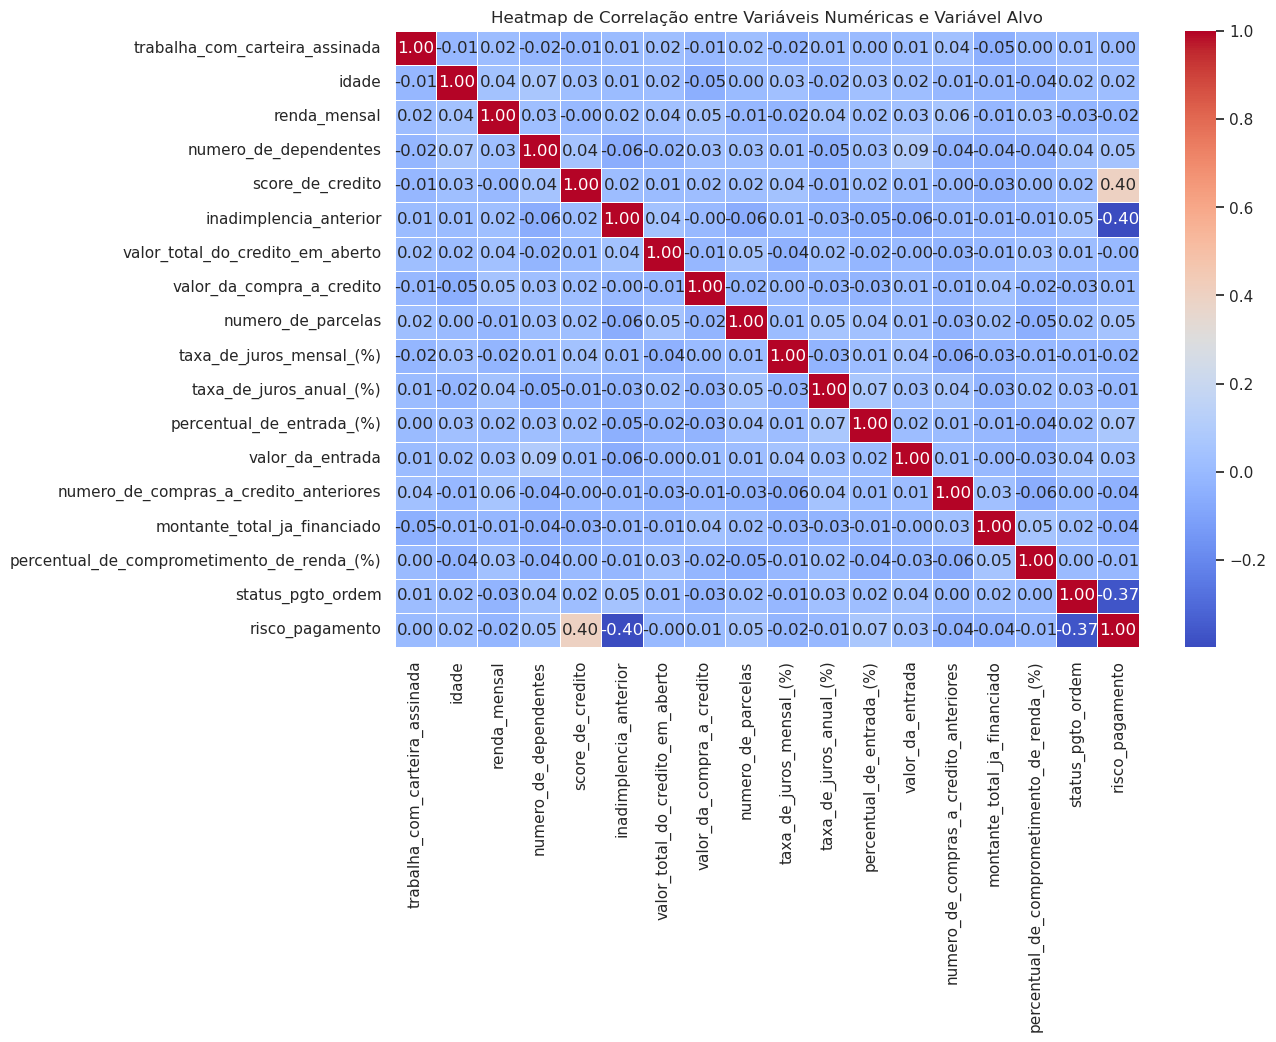

In [25]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas as colunas numéricas e a variável alvo
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['risco_pagamento'])
y = df['risco_pagamento']

# Treinar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obter a importância das variáveis e convertê-las para percentuais
importancia = rf.feature_importances_ * 100
importancia_percentual = dict(zip(X.columns, importancia))

# Ordenar e exibir a importância das variáveis em percentual
importancia_percentual = {k: v for k, v in sorted(importancia_percentual.items(), key=lambda item: item[1], reverse=True)}
print("Importância das Variáveis (%):")
for variavel, valor in importancia_percentual.items():
    print(f"{variavel}: {valor:.2f}%")

# Plotar o Heatmap de Correlação
plt.figure(figsize=(12, 8))
correlacao = df[X.columns.tolist() + ['risco_pagamento']].corr()
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação entre Variáveis Numéricas e Variável Alvo")
plt.show()


### Os resultados indicam as variáveis mais influentes para o modelo de classificação de risco:

#### Principais Variáveis:

score_de_credito, status_pgto_ordem, e inadimplencia_anterior são as variáveis com maior importância, sugerindo que o histórico de crédito e o comportamento atual de pagamento são fatores cruciais para prever o risco de inadimplência.
Variáveis Moderadas:

Variáveis como valor_da_compra_a_credito, montante_total_ja_financiado, e cpf também têm uma influência moderada, possivelmente refletindo o valor total de crédito e o histórico de relacionamento do cliente.
Variáveis Menos Influentes:

trabalha_com_carteira_assinada e numero_de_dependentes mostraram pouca importância, indicando que essas características têm um impacto mínimo no risco de crédito para este modelo.

## Adicionando novas Features

In [28]:
# Ajustar a criação da coluna 'score_ajustado' com uma penalização de 50% para clientes com histórico de inadimplência
df['score_ajustado'] = df.apply(
    lambda row: row['score_de_credito'] * 0.5 if row['inadimplencia_anterior'] == 1 else row['score_de_credito'],
    axis=1
)





In [29]:
# Visualizar uma amostra para verificar os ajustes
df[['score_de_credito', 'inadimplencia_anterior', 'score_ajustado']].sample(10)


,score_de_credito,inadimplencia_anterior,score_ajustado
145,567,0,567.0
884,502,0,502.0
393,772,0,772.0
854,684,0,684.0
220,385,1,192.5
136,833,0,833.0
1,818,0,818.0
82,515,0,515.0
399,598,0,598.0
249,653,0,653.0


In [30]:
# Visualizar uma amostra de dados da nova coluna 'score_ajustado'
df[['score_ajustado']].sample(5)

,score_ajustado
26,598.0
12,331.0
833,651.0
55,402.0
480,640.0


In [31]:
# Filtrar apenas as colunas numéricas e a variável alvo
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['risco_pagamento'])
y = df['risco_pagamento']

# Treinar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obter a importância das variáveis e convertê-las para percentuais
importancia = rf.feature_importances_ * 100
importancia_percentual = dict(zip(X.columns, importancia))

# Ordenar e exibir a importância das variáveis em percentual
importancia_percentual = {k: v for k, v in sorted(importancia_percentual.items(), key=lambda item: item[1], reverse=True)}
print("Importância das Variáveis (%):")
for variavel, valor in importancia_percentual.items():
    print(f"{variavel}: {valor:.2f}%")

Importância das Variáveis (%):
score_ajustado: 33.73%
status_pgto_ordem: 23.94%
score_de_credito: 12.47%
inadimplencia_anterior: 6.55%
valor_da_compra_a_credito: 2.49%
montante_total_ja_financiado: 2.26%
renda_mensal: 2.24%
percentual_de_comprometimento_de_renda_(%): 2.19%
valor_total_do_credito_em_aberto: 2.14%
taxa_de_juros_anual_(%): 1.96%
valor_da_entrada: 1.89%
numero_de_compras_a_credito_anteriores: 1.89%
taxa_de_juros_mensal_(%): 1.76%
idade: 1.62%
numero_de_dependentes: 1.08%
percentual_de_entrada_(%): 0.92%
numero_de_parcelas: 0.68%
trabalha_com_carteira_assinada: 0.18%


## A SEGUIR O TREINAMENTO DO MODELO PARA PREVER O RISCO DA OPERAÇÃO 

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error

# Separar os dados em treino e teste
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['risco_pagamento'])
y = df['risco_pagamento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Prever a variável alvo no conjunto de teste
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidade para métricas contínuas

# Calcular as métricas
mse = mean_squared_error(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_proba)

# Exibir os resultados
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


MSE (Mean Squared Error): 0.0516
F1-Score: 0.8889
MAE (Mean Absolute Error): 0.0761


In [34]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')  # Ignora todos os warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignora FutureWarnings

# Definir os hiperparâmetros para o GridSearch
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar o modelo XGBoost com verbosity=0 para reduzir mensagens de log
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)

# Configurar o GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Executar o GridSearch para encontrar os melhores parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor score encontrado
print("Melhores Hiperparâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

# Treinar o modelo com os melhores parâmetros encontrados
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Avaliar o modelo otimizado com as métricas solicitadas
mse = mean_squared_error(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_proba)

# Exibir as métricas do modelo otimizado
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Melhores Hiperparâmetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Melhor F1-Score: 0.9034099332839141
MSE (Mean Squared Error): 0.0434
F1-Score: 0.8908
MAE (Mean Absolute Error): 0.0924


In [35]:
# salvar o novo dataset transformado para deploy

# Definir o caminho para salvar o dataset transformado no mesmo diretório do notebook
novo_dataset_path = './dataset_crediario_transformado.csv'

# Salvar o DataFrame atualizado (transformado) em um novo arquivo CSV
df.to_csv(novo_dataset_path, index=False)

print(f"Novo dataset salvo com sucesso no diretório atual como: {novo_dataset_path}")


Novo dataset salvo com sucesso no diretório atual como: ./dataset_crediario_transformado.csv


In [36]:
import joblib
import os

# Definir o caminho para salvar o modelo no diretório atual
model_path = os.path.join('./', 'modelo_class_risco_credito.pkl')

# Salvar o modelo otimizado em disco
joblib.dump(best_xgb_model, model_path)

print(f"Modelo salvo em: {model_path}")


Modelo salvo em: ./modelo_class_risco_credito.pkl
